# Neon Films Analysis of Audience Movie Preferences

## Step 1: Data Collection

#### A. Load list of movies

In [8]:
import pandas as pd

try:
    # load excel file
    movies_list = pd.read_excel("data/movies.xlsx")
    print("File loaded successfully.")

except Exception as e:
    # handle errors
    print(f"Error loading file: {e}")

File loaded successfully.


In [16]:
movies_list.head()

                title
0  The Age of Adaline
1     Black Christmas
2              London
3             Twisted
4   Friends with Kids


In [10]:
print('Number of movies:', movies_list.size)

Number of movies: 150


#### B. Fetch data from OMDB API

In [11]:
import requests
import time

# OMDB API Key
OMDB_API_KEY = "c0c5b16c"

In [27]:
# Function: get_omdb_data_title
# Description: gets data from OMDP API for movie title
# Input: movie title (str)
# Output: dict containing movie data if successful, otherwise None
# Example Usage: movie_data = get_omdb_data_title("Inception")
def get_omdb_data_title(title):
    try:
        # request data from OMDP API
        url = f"http://www.omdbapi.com/?t={title}&apikey={OMDB_API_KEY}"
        response = requests.get(url)
        data = response.json()
        # if response is recieved
        if data.get("Response") == "True":
            return {
                "title": data.get("Title"),
                "year": data.get("Year"),
                "rated": data.get("Rated"),
                "runtime": data.get("Runtime"),
                "imdb_rating": data.get("imdbRating"),
                "imdb_votes": data.get("imdbVotes"),
                "box_office": data.get("BoxOffice"),
                "released": data.get("Released"),
                "genre": data.get("Genre"),
                "director": data.get("Director"),
                "writer": data.get("Writer"),
                "actors": data.get("Actors"),
                "plot": data.get("Plot"),
                "language": data.get("Language"),
                "country": data.get("Country"),
                "awards": data.get("Awards"),
                "poster": data.get("Poster"),
                "metascore": data.get("Metascore"),
                "ratings": data.get("Ratings")
            }
        else:
            return None
    # handle errors
    except Exception as e:
        print(f"Error: {e}")
        return None

In [28]:
# get_omdb_data_from_title test 
movie_data = get_omdb_data_title("Inception")
if movie_data:
    print(movie_data)
else:
    print("Movie data not found.")

{'title': 'Inception', 'year': '2010', 'rated': 'PG-13', 'runtime': '148 min', 'imdb_rating': '8.8', 'imdb_votes': '2,645,456', 'box_office': '$292,587,330', 'released': '16 Jul 2010', 'genre': 'Action, Adventure, Sci-Fi', 'director': 'Christopher Nolan', 'writer': 'Christopher Nolan', 'actors': 'Leonardo DiCaprio, Joseph Gordon-Levitt, Elliot Page', 'plot': 'A thief who steals corporate secrets through the use of dream-sharing technology is given the inverse task of planting an idea into the mind of a C.E.O., but his tragic past may doom the project and his team to disaster.', 'language': 'English, Japanese, French', 'country': 'United States, United Kingdom', 'awards': 'Won 4 Oscars. 159 wins & 220 nominations total', 'poster': 'https://m.media-amazon.com/images/M/MV5BMjAxMzY3NjcxNF5BMl5BanBnXkFtZTcwNTI5OTM0Mw@@._V1_SX300.jpg', 'metascore': '74', 'ratings': [{'Source': 'Internet Movie Database', 'Value': '8.8/10'}, {'Source': 'Rotten Tomatoes', 'Value': '87%'}, {'Source': 'Metacritic

In [29]:
# Function: get_omdb_data_dataframe
# Description: gets data from OMDP API for dataframe
# Input: list of movies (dataframe), delay in seconds between API requests (int)
# Output: dataframe containing data for each movie in the input if successful, otherwise None
# Example Usage: movies_df = get_omdb_data_dataframe(movies_list, delay=1)
def get_omdb_data_dataframe(df, delay=1):
    # store data for each movie
    omdb_data = []
    # go through movie list
    for i, title in enumerate(df["title"]):
        print(f"Getting data of movie {i+1}/{len(df)}: {title}")
        try:
            # get data for each movie
            data = get_omdb_data_from_title(title)
            if data:
                omdb_data.append(data)
        except Exception as e:
            print(f"Error fetching data for '{title}': {e}")
        finally:
            # set delay to avoid API rate limits
            time.sleep(delay)

    # convert list to dataframe
    omdb_df = pd.DataFrame(omdb_data)
    return omdb_df

In [30]:
import os

# define excel file path to store omdb data
omdb_path = "data/omdp_data.xlsx"

# If the Excel file does not exist, fetch data and save it to the file
if not os.path.exists(omdb_path):
    print("Fetching data from OMDB API...")
    movies_df = get_omdb_data_dataframe(movies_list, delay=1)
    print(f"Saving data to {omdb_path}...")
    try:
        movies_df.to_excel(omdb_path, index=False)
        print(f"Data saved successfully to {omdb_path}.")
    except Exception as e:
        print(f"Error saving {omdb_path}: {e}")

Fetching data from OMDB API...
Getting data of movie 1/150: The Age Of Adaline
Getting data of movie 2/150: Black Christmas
Getting data of movie 3/150: London
Getting data of movie 4/150: Twisted
Getting data of movie 5/150: Friends With Kids
Getting data of movie 6/150: Ken Park
Getting data of movie 7/150: Girls Trip
Getting data of movie 8/150: The Art Of The Steal
Getting data of movie 9/150: Macbeth
Getting data of movie 10/150: Fatherhood
Getting data of movie 11/150: London Has Fallen
Getting data of movie 12/150: Anthropoid
Getting data of movie 13/150: Me, Myself & Irene
Getting data of movie 14/150: The Last Face
Getting data of movie 15/150: The Fly
Getting data of movie 16/150: A Quiet Place
Getting data of movie 17/150: God'S Not Dead 2
Getting data of movie 18/150: Marvel One-Shot: Agent Carter
Getting data of movie 19/150: Hamlet 2
Getting data of movie 20/150: Where The Truth Lies
Getting data of movie 21/150: Ashby
Getting data of movie 22/150: Jaws
Getting data of mo

In [77]:
# load movies_df from excel file
omdb_path = "data/omdp_data.xlsx"
try:
    print(f"Loading data from {omdb_path}...")
    movies_df = pd.read_excel(omdb_path)
    print("Successfully loaded.")
except Exception as e:
    print(f"Error loading {omdb_path}: {e}")
    movies_df = pd.DataFrame()

Loading data from data/omdp_data.xlsx...
Successfully loaded.


In [173]:
# check loaded dataframe
movies_df.head()

,Title,Year,Rated,Runtime,IMDB_Rating,IMDB_Votes,Box_Office,Released,Genre,Director,Writer,Actors,Plot,Language,Country,Awards,Poster,Metascore,Ratings
0,The Age Of Adaline,2015,PG-13,112 min,7.2,"212,877","$42,629,776",24 Apr 2015,"Drama, Fantasy, Romance",Lee Toland Krieger,"J. Mills Goodloe, Salvador Paskowitz","Blake Lively, Michiel Huisman, Harrison Ford","A young woman, born at the turn of the 20th ce...","English, Portuguese, Italian","United States, Canada",1 win & 10 nominations,https://m.media-amazon.com/images/M/MV5BMTAzMT...,51.0,"[{'Source': 'Internet Movie Database', 'Value'..."
1,Black Christmas,1974,R,98 min,7.1,"50,352",NaN,20 Dec 1974,"Horror, Mystery, Thriller",Bob Clark,Roy Moore,"Olivia Hussey, Keir Dullea, Margot Kidder","During their Christmas break, a group of soror...","English, Latin",Canada,3 wins & 2 nominations,https://m.media-amazon.com/images/M/MV5BZjdiMz...,65.0,"[{'Source': 'Internet Movie Database', 'Value'..."
2,London,2005,R,92 min,6.3,"25,119","$20,361",03 Jul 2021,"Drama, Romance",Hunter Richards,Hunter Richards,"Jessica Biel, Chris Evans, Jason Statham","At a drug laden party in a New York loft, a yo...",English,"United Kingdom, United States",1 win & 1 nomination total,https://m.media-amazon.com/images/M/MV5BMTc5Mz...,24.0,"[{'Source': 'Internet Movie Database', 'Value'..."
3,Twisted,2004,R,97 min,5.3,"23,599","$25,198,598",27 Feb 2004,"Crime, Drama, Mystery",Philip Kaufman,Sarah Thorp,"Ashley Judd, Samuel L. Jackson, Andy Garcia","Jessica, whose father killed her mother and co...","English, Italian, Spanish","United States, Germany",1 win,https://m.media-amazon.com/images/M/MV5BMGJhNj...,26.0,"[{'Source': 'Internet Movie Database', 'Value'..."
4,Friends With Kids,2011,R,107 min,6.1,"43,369","$7,251,073",16 Mar 2012,"Comedy, Drama, Romance",Jennifer Westfeldt,Jennifer Westfeldt,"Jennifer Westfeldt, Adam Scott, Maya Rudolph",Two best friends decide to have a child togeth...,English,United States,2 nominations,https://m.media-amazon.com/images/M/MV5BMjIyMD...,55.0,"[{'Source': 'Internet Movie Database', 'Value'..."


In [79]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        150 non-null    object 
 1   Year         150 non-null    int64  
 2   Rated        147 non-null    object 
 3   Runtime      150 non-null    object 
 4   IMDB_Rating  150 non-null    float64
 5   IMDB_Votes   150 non-null    object 
 6   Box_Office   115 non-null    object 
 7   Released     150 non-null    object 
 8   Genre        150 non-null    object 
 9   Director     150 non-null    object 
 10  Writer       150 non-null    object 
 11  Actors       150 non-null    object 
 12  Plot         150 non-null    object 
 13  Language     149 non-null    object 
 14  Country      150 non-null    object 
 15  Awards       128 non-null    object 
 16  Poster       150 non-null    object 
 17  Metascore    131 non-null    float64
 18  Ratings      150 non-null    object 
dtypes: float

#### C. Fetch data from Google Trends

In [87]:
# initialize trendspy
from trendspy import Trends
tr = Trends(request_delay=10.0)

In [81]:
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

# Function: get_googletrends_data_title
# Description: gets data from google trends for movie title
# Input: trendspy instance, movie title (str), movie release date (str)
# Output: total number of searches up to one year after movie release date (int)
# Example Usage: num_searches = get_googletrends_data_title(tr, 'inception', '16 Jul 2010')
def get_googletrends_data_title(tr, movie_title, release_date):
    try:
        # convert release date to datetime format
        release_datetime = datetime.strptime(release_date, "%d %b %Y")
        # get date for one year later
        one_year_later = release_datetime + relativedelta(years=1)
        one_year_later_strftime = one_year_later.strftime("%Y-%m-%d")

        # timeframe string
        timeframe = f'{one_year_later_strftime} 1-y'

        # get number of movie searches
        interest_data = tr.interest_over_time(movie_title, timeframe=timeframe)

        if not interest_data.empty:
            # get total number of searches in timeframe
            total_searches = interest_data[movie_title].sum()
            return total_searches
        else:
            return 0
    except Exception as e:
        print(f"Error fetching data for '{movie_title}': {e}")
        return 0

In [88]:
# get_googletrends_data_title test 
movie_data = get_omdb_data_title("Inception")
num_searches = get_googletrends_data_title(tr, 'inception', '16 Jul 2010')
print(num_searches)

890


In [129]:
# Function: get_googletrends_data_dataframe
# Description: gets data from google trends for dataframe
# Input: search_cache (dict) stores fetched data, movies dataframe, delay to avoid api rate limits
# Output: dataframe containing number of searches for each movie
# Example Usage: num_searches_df = get_googletrends_data_dataframe(movies_df)
def get_googletrends_data_dataframe(search_cache, movies_df, delay=1):
    # list to store results
    results = []

    # iterate over each movie in dataframe
    for i, row in movies_df.iterrows():
        title = row['Title']
        # remove ':' from titles to prevent error in fetching data
        modified_title = title.replace(":", "")
        release_date = row['Released']

        print(f"Getting data of movie {i + 1}/{len(movies_df)}: {title}")
        
        # check to see if we already have the number of searches
        if title in search_cache:
            print(f"Using cached data for '{title}'")
            num_searches = search_cache[title]
            
        else:
            try:
                # get total searches for the movie
                num_searches = get_googletrends_data_title(tr, modified_title, release_date)
                # store in cache
                if(num_searches > 0):
                    search_cache[title] = num_searches
            except Exception as e:
                print(f"Error fetching data for '{title}': {e}")
                num_searches = 0
            

        # add to results
        results.append({"Title": title, "Num_Searches": num_searches})
        
        # add delay to avoid api rate limits
        time.sleep(delay)

    # convert to dataframe
    searches_df = pd.DataFrame(results)
    return searches_df

In [131]:
# find movies released after 2006
before06 = movies_df[movies_df['Year'] < 2006]
before06_count = before06.shape[0]
print(f'movies released before 2006: {before06_count}')

movies released before 2006: 56


In [132]:
# seperate movies released after 2006
movies_df_06 = movies_df[movies_df['Year'] > 2006]
movies_df_06_reset = movies_df_06.reset_index(drop=True)

In [133]:
movies_df_06_reset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        88 non-null     object 
 1   Year         88 non-null     int64  
 2   Rated        85 non-null     object 
 3   Runtime      88 non-null     object 
 4   IMDB_Rating  88 non-null     float64
 5   IMDB_Votes   88 non-null     object 
 6   Box_Office   56 non-null     object 
 7   Released     88 non-null     object 
 8   Genre        88 non-null     object 
 9   Director     88 non-null     object 
 10  Writer       88 non-null     object 
 11  Actors       88 non-null     object 
 12  Plot         88 non-null     object 
 13  Language     87 non-null     object 
 14  Country      88 non-null     object 
 15  Awards       72 non-null     object 
 16  Poster       88 non-null     object 
 17  Metascore    72 non-null     float64
 18  Ratings      88 non-null     object 
dtypes: float64

In [134]:
movies_df_06_reset.head()

,Title,Year,Rated,Runtime,IMDB_Rating,IMDB_Votes,Box_Office,Released,Genre,Director,Writer,Actors,Plot,Language,Country,Awards,Poster,Metascore,Ratings
0,The Age of Adaline,2015,PG-13,112 min,7.2,"212,877","$42,629,776",24 Apr 2015,"Drama, Fantasy, Romance",Lee Toland Krieger,"J. Mills Goodloe, Salvador Paskowitz","Blake Lively, Michiel Huisman, Harrison Ford","A young woman, born at the turn of the 20th ce...","English, Portuguese, Italian","United States, Canada",1 win & 10 nominations,https://m.media-amazon.com/images/M/MV5BMTAzMT...,51.0,"[{'Source': 'Internet Movie Database', 'Value'..."
1,Friends with Kids,2011,R,107 min,6.1,"43,369","$7,251,073",16 Mar 2012,"Comedy, Drama, Romance",Jennifer Westfeldt,Jennifer Westfeldt,"Jennifer Westfeldt, Adam Scott, Maya Rudolph",Two best friends decide to have a child togeth...,English,United States,2 nominations,https://m.media-amazon.com/images/M/MV5BMjIyMD...,55.0,"[{'Source': 'Internet Movie Database', 'Value'..."
2,Girls Trip,2017,R,122 min,6.2,"41,464","$115,171,585",21 Jul 2017,"Adventure, Comedy, Drama",Malcolm D. Lee,"Erica Rivinoja, Kenya Barris, Tracy Oliver","Regina Hall, Queen Latifah, Jada Pinkett Smith",When four lifelong friends travel to New Orlea...,English,"United States, Canada, China",13 wins & 42 nominations total,https://m.media-amazon.com/images/M/MV5BMjMwNT...,71.0,"[{'Source': 'Internet Movie Database', 'Value'..."
3,The Art of the Steal,2013,R,90 min,6.3,"26,330","$64,065",18 Jun 2014,"Comedy, Crime, Thriller",Jonathan Sobol,Jonathan Sobol,"Kurt Russell, Jay Baruchel, Katheryn Winnick","Crunch Calhoun, a semi-reformed art thief, agr...","English, Spanish","Canada, United States",5 nominations,https://m.media-amazon.com/images/M/MV5BNjUxNj...,53.0,"[{'Source': 'Internet Movie Database', 'Value'..."
4,Macbeth,2015,R,113 min,6.6,"60,210","$1,110,707",11 Dec 2015,"Drama, History, War",Justin Kurzel,"Todd Louiso, Jacob Koskoff, Michael Lesslie","Michael Fassbender, Marion Cotillard, Jack Mad...","Macbeth, the Thane of Glamis, receives a proph...",English,"United Kingdom, France",3 wins & 29 nominations total,https://m.media-amazon.com/images/M/MV5BNzgyND...,71.0,"[{'Source': 'Internet Movie Database', 'Value'..."


In [ ]:
# Initialize a dictionary to cache search results
search_cache = {}

In [135]:
# if you get TOO many errors when fetching google trends data, ONLY run this cell again
# DO NOT INITIALIZE SEARCH_CACHE AGAIN!!

# define excel file path to store googletrends data
googletrends_path = "data/googletrends_data.xlsx"
googletrends_df = get_googletrends_data_dataframe(search_cache, movies_df_06_reset, delay=1)
print(f"Saving data to {googletrends_path}...")
try:
    googletrends_df.to_excel(googletrends_path, index=False)
    print(f"Data saved successfully to {googletrends_path}.")
except Exception as e:
    print(f"Error saving {googletrends_path}: {e}")

Getting data of movie 1/88: The Age of Adaline
Using cached data for 'The Age of Adaline'
Getting data of movie 2/88: Friends with Kids
Using cached data for 'Friends with Kids'
Getting data of movie 3/88: Girls Trip
Using cached data for 'Girls Trip'
Getting data of movie 4/88: The Art of the Steal
Using cached data for 'The Art of the Steal'
Getting data of movie 5/88: Macbeth
Using cached data for 'Macbeth'
Getting data of movie 6/88: Fatherhood
Using cached data for 'Fatherhood'
Getting data of movie 7/88: London Has Fallen
Using cached data for 'London Has Fallen'
Getting data of movie 8/88: Anthropoid
Using cached data for 'Anthropoid'
Getting data of movie 9/88: The Last Face
Using cached data for 'The Last Face'
Getting data of movie 10/88: A Quiet Place
Using cached data for 'A Quiet Place'
Getting data of movie 11/88: God's Not Dead 2
Using cached data for 'God's Not Dead 2'
Getting data of movie 12/88: Marvel One-Shot: Agent Carter
Getting data of movie 13/88: Hamlet 2
Using

In [136]:
search_cache

{'The Age of Adaline': 1233,
 'Friends with Kids': 1443,
 'Girls Trip': 681,
 'The Art of the Steal': 1132,
 'Macbeth': 2745,
 'Fatherhood': 357,
 'London Has Fallen': 866,
 'Anthropoid': 1836,
 'The Last Face': 3052,
 'A Quiet Place': 670,
 "God's Not Dead 2": 652,
 'Hamlet 2': 727,
 'Ashby': 3516,
 'Middle Men': 1301,
 "Dad's Army": 1165,
 'Georgetown': 4678,
 'Horse Girl': 1532,
 'The Taking of Deborah Logan': 1578,
 'Song to Song': 4654,
 'Pay the Ghost': 887,
 'The Art of Self-Defense': 339,
 'Ninja Assassin': 1214,
 'Bad Hair Day': 1628,
 'The Hunting Party': 848,
 'Certain Women': 2462,
 'The Post': 2284,
 'Special Correspondents': 408,
 'Now You See Me 2': 1239,
 'Bedtime Stories': 639,
 'Red Shoes and the Seven Dwarfs': 2108,
 'Paradise Hills': 2263,
 'Black Butterfly': 2443,
 'Saving Mr. Banks': 987,
 'Elegy': 1983,
 'Welcome to Marwen': 384,
 'Berberian Sound Studio': 1087,
 'Frankenweenie': 1479,
 'The Haunting of Sharon Tate': 1212,
 'Unknown': 2760,
 'Power Rangers': 1092

In [137]:
googletrends_df

,Title,Num_Searches
0,The Age of Adaline,1233
1,Friends with Kids,1443
2,Girls Trip,681
3,The Art of the Steal,1132
4,Macbeth,2745
...,...,...
83,National Treasure: Book of Secrets,488
84,I Am Mother,465
85,Awake,2463
86,Book of Dragons,1107


In [139]:
zero_count = (googletrends_df['Num_Searches'] == 0).sum()
print(f"failed to fetch data for {zero_count} movies")
failed_movies = googletrends_df[googletrends_df['Num_Searches'] == 0]
print('Movies without data:')
print(failed_movies)

failed to fetch data for 1 movies
Movies without data:
                   Title  Num_Searches
54  World's Greatest Dad             0


In [140]:
# load googletrends_df from excel file
googletrends_path = "data/googletrends_data.xlsx"
try:
    print(f"Loading data from {googletrends_path}...")
    googletrends_df = pd.read_excel(googletrends_path)
    print("Successfully loaded.")
except Exception as e:
    print(f"Error loading {googletrends_path}: {e}")
    googletrends_df = pd.DataFrame()

Loading data from data/googletrends_data.xlsx...
Successfully loaded.


In [141]:
googletrends_df

,Title,Num_Searches
0,The Age of Adaline,1233
1,Friends with Kids,1443
2,Girls Trip,681
3,The Art of the Steal,1132
4,Macbeth,2745
...,...,...
83,National Treasure: Book of Secrets,488
84,I Am Mother,465
85,Awake,2463
86,Book of Dragons,1107


## Step 2: Data Cleaning and Preperation

#### A. Merging data from both APIs

In [406]:
# make sure titles are in the same format
movies_df["Title"] = movies_df["Title"].str.title()
googletrends_df["Title"] = googletrends_df["Title"].str.title()

# merge dataframes on movie title
merged_df = pd.merge(movies_df, googletrends_df, on="Title", how="left")

# fill missing number of searches with 0
merged_df["Num_Searches"] = merged_df["Num_Searches"].fillna(0)

In [407]:
merged_df.head()

,Title,Year,Rated,Runtime,IMDB_Rating,IMDB_Votes,Box_Office,Released,Genre,Director,Writer,Actors,Plot,Language,Country,Awards,Poster,Metascore,Ratings,Num_Searches
0,The Age Of Adaline,2015,PG-13,112 min,7.2,"212,877","$42,629,776",24 Apr 2015,"Drama, Fantasy, Romance",Lee Toland Krieger,"J. Mills Goodloe, Salvador Paskowitz","Blake Lively, Michiel Huisman, Harrison Ford","A young woman, born at the turn of the 20th ce...","English, Portuguese, Italian","United States, Canada",1 win & 10 nominations,https://m.media-amazon.com/images/M/MV5BMTAzMT...,51.0,"[{'Source': 'Internet Movie Database', 'Value'...",1233.0
1,Black Christmas,1974,R,98 min,7.1,"50,352",NaN,20 Dec 1974,"Horror, Mystery, Thriller",Bob Clark,Roy Moore,"Olivia Hussey, Keir Dullea, Margot Kidder","During their Christmas break, a group of soror...","English, Latin",Canada,3 wins & 2 nominations,https://m.media-amazon.com/images/M/MV5BZjdiMz...,65.0,"[{'Source': 'Internet Movie Database', 'Value'...",0.0
2,London,2005,R,92 min,6.3,"25,119","$20,361",03 Jul 2021,"Drama, Romance",Hunter Richards,Hunter Richards,"Jessica Biel, Chris Evans, Jason Statham","At a drug laden party in a New York loft, a yo...",English,"United Kingdom, United States",1 win & 1 nomination total,https://m.media-amazon.com/images/M/MV5BMTc5Mz...,24.0,"[{'Source': 'Internet Movie Database', 'Value'...",0.0
3,Twisted,2004,R,97 min,5.3,"23,599","$25,198,598",27 Feb 2004,"Crime, Drama, Mystery",Philip Kaufman,Sarah Thorp,"Ashley Judd, Samuel L. Jackson, Andy Garcia","Jessica, whose father killed her mother and co...","English, Italian, Spanish","United States, Germany",1 win,https://m.media-amazon.com/images/M/MV5BMGJhNj...,26.0,"[{'Source': 'Internet Movie Database', 'Value'...",0.0
4,Friends With Kids,2011,R,107 min,6.1,"43,369","$7,251,073",16 Mar 2012,"Comedy, Drama, Romance",Jennifer Westfeldt,Jennifer Westfeldt,"Jennifer Westfeldt, Adam Scott, Maya Rudolph",Two best friends decide to have a child togeth...,English,United States,2 nominations,https://m.media-amazon.com/images/M/MV5BMjIyMD...,55.0,"[{'Source': 'Internet Movie Database', 'Value'...",1443.0


In [408]:
zero_count = (merged_df['Num_Searches'] == 0).sum()
print(f"{zero_count} movies without search counts.")

63 movies without search counts.


#### B. Cleaning data

In [409]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         150 non-null    object 
 1   Year          150 non-null    int64  
 2   Rated         147 non-null    object 
 3   Runtime       150 non-null    object 
 4   IMDB_Rating   150 non-null    float64
 5   IMDB_Votes    150 non-null    object 
 6   Box_Office    115 non-null    object 
 7   Released      150 non-null    object 
 8   Genre         150 non-null    object 
 9   Director      150 non-null    object 
 10  Writer        150 non-null    object 
 11  Actors        150 non-null    object 
 12  Plot          150 non-null    object 
 13  Language      149 non-null    object 
 14  Country       150 non-null    object 
 15  Awards        128 non-null    object 
 16  Poster        150 non-null    object 
 17  Metascore     131 non-null    float64
 18  Ratings       150 non-null    

In [410]:
# unique values in the rated column
merged_df['Rated'].unique()

array(['PG-13', 'R', 'Not Rated', 'PG', 'Unrated', 'G', 'TV-G', 'TV-MA',
       'TV-14', 'Approved', nan, 'TV-PG', 'NC-17'], dtype=object)

In [411]:
# Function: clean_data
# Description: handles missing values, removes duplicates, converts datatypes, and standardizes texts
# Input: dataframe
# Output: cleaned dataframe
# Example Usage: cleaned_df = clean_data(df)
def clean_data(df):
    
    # remove duplicates
    df = df.drop_duplicates(subset=["Title"])
    
    # standardize texts
    text_columns = ["Title", "Genre", "Director", "Writer", "Actors", "Language", "Country"]
    for col in text_columns:
        df[col] = df[col].str.title()

    # fill missing values
    df['Rated'] = df['Rated'].fillna('Not Rated')
    df["Box_Office"] = df["Box_Office"].fillna("$0")
    df["Language"] = df["Language"].fillna("English")
    df["Country"] = df["Country"].fillna("United States")
    df['Awards'] = df['Awards'].fillna('No Awards.')
    df['Metascore'] = df['Metascore'].fillna(-1)
    df["Num_Searches"] = df["Num_Searches"].fillna(0)

    # convert data types
    df['Year'] = df['Year'].astype(int)
    df["Runtime"] = df["Runtime"].str.replace(" min", "").astype(int)
    df['IMDB_Votes'] = df['IMDB_Votes'].str.replace(',', '').astype(int)
    df["Box_Office"] = df["Box_Office"].str.replace("$", "").str.replace(",", "").astype(int)
    df["Released"] = pd.to_datetime(df["Released"], format="%d %b %Y")
    df['Metascore'] = df['Metascore'].astype(int)
    df['Num_Searches'] = df['Num_Searches'].astype(int)

    return df

In [412]:
cleaned_df = clean_data(merged_df)
cleaned_df.head()

,Title,Year,Rated,Runtime,IMDB_Rating,IMDB_Votes,Box_Office,Released,Genre,Director,Writer,Actors,Plot,Language,Country,Awards,Poster,Metascore,Ratings,Num_Searches
0,The Age Of Adaline,2015,PG-13,112,7.2,212877,42629776,2015-04-24,"Drama, Fantasy, Romance",Lee Toland Krieger,"J. Mills Goodloe, Salvador Paskowitz","Blake Lively, Michiel Huisman, Harrison Ford","A young woman, born at the turn of the 20th ce...","English, Portuguese, Italian","United States, Canada",1 win & 10 nominations,https://m.media-amazon.com/images/M/MV5BMTAzMT...,51,"[{'Source': 'Internet Movie Database', 'Value'...",1233
1,Black Christmas,1974,R,98,7.1,50352,0,1974-12-20,"Horror, Mystery, Thriller",Bob Clark,Roy Moore,"Olivia Hussey, Keir Dullea, Margot Kidder","During their Christmas break, a group of soror...","English, Latin",Canada,3 wins & 2 nominations,https://m.media-amazon.com/images/M/MV5BZjdiMz...,65,"[{'Source': 'Internet Movie Database', 'Value'...",0
2,London,2005,R,92,6.3,25119,20361,2021-07-03,"Drama, Romance",Hunter Richards,Hunter Richards,"Jessica Biel, Chris Evans, Jason Statham","At a drug laden party in a New York loft, a yo...",English,"United Kingdom, United States",1 win & 1 nomination total,https://m.media-amazon.com/images/M/MV5BMTc5Mz...,24,"[{'Source': 'Internet Movie Database', 'Value'...",0
3,Twisted,2004,R,97,5.3,23599,25198598,2004-02-27,"Crime, Drama, Mystery",Philip Kaufman,Sarah Thorp,"Ashley Judd, Samuel L. Jackson, Andy Garcia","Jessica, whose father killed her mother and co...","English, Italian, Spanish","United States, Germany",1 win,https://m.media-amazon.com/images/M/MV5BMGJhNj...,26,"[{'Source': 'Internet Movie Database', 'Value'...",0
4,Friends With Kids,2011,R,107,6.1,43369,7251073,2012-03-16,"Comedy, Drama, Romance",Jennifer Westfeldt,Jennifer Westfeldt,"Jennifer Westfeldt, Adam Scott, Maya Rudolph",Two best friends decide to have a child togeth...,English,United States,2 nominations,https://m.media-amazon.com/images/M/MV5BMjIyMD...,55,"[{'Source': 'Internet Movie Database', 'Value'...",1443


In [413]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Title         150 non-null    object        
 1   Year          150 non-null    int64         
 2   Rated         150 non-null    object        
 3   Runtime       150 non-null    int64         
 4   IMDB_Rating   150 non-null    float64       
 5   IMDB_Votes    150 non-null    int64         
 6   Box_Office    150 non-null    int64         
 7   Released      150 non-null    datetime64[ns]
 8   Genre         150 non-null    object        
 9   Director      150 non-null    object        
 10  Writer        150 non-null    object        
 11  Actors        150 non-null    object        
 12  Plot          150 non-null    object        
 13  Language      150 non-null    object        
 14  Country       150 non-null    object        
 15  Awards        150 non-null    object    

#### C. Processing data

In [414]:
print('Mean Runtime:', cleaned_df['Runtime'].mean())
print('Median Runtime:', cleaned_df['Runtime'].median())

Mean Runtime: 103.86666666666666
Median Runtime: 100.5


In [415]:
print('Mean votes:', cleaned_df['IMDB_Votes'].mean())
print('Median votes:', cleaned_df['IMDB_Votes'].median())

Mean votes: 122769.86
Median votes: 42244.5


In [416]:
# Function: process_data
# Description: extracts and creates new features, handles outliers
# Input: dataframe
# Output: processed dataframe
# Example Usage: processed_df = process_data(df)
def process_data(df):
    
    # group features
    df['Rated'] = df['Rated'].replace('Not Rated', 'Unrated')
    df['Rated'] = df['Rated'].replace('NC-17', 'R')
    df['Rated'] = df['Rated'].replace('TV-MA', 'R')
    df['Rated'] = df['Rated'].replace('PG-13', 'PG')
    df['Rated'] = df['Rated'].replace('TV-PG', 'PG')
    df['Rated'] = df['Rated'].replace('TV-14', 'PG')
    df['Rated'] = df['Rated'].replace('TV-G', 'G')
    df['Rated'] = df['Rated'].replace('Approved', 'G')
    
    # extract new features
    df["Month"] = df["Released"].dt.month
    df["Decade"] = (df["Year"] // 10) * 10
    df["Genre_Count"] = df["Genre"].str.split(",").apply(len)
    df["Popularity"] = df["IMDB_Rating"].apply(lambda x: 2 if x >= 7.5 else 1 if x >= 4.5 else 0)
    
    # handle outliers
    df = df[(df["Runtime"] >= 60) & (df["Runtime"] <= 240)]
    df = df[df["IMDB_Votes"] >= 1000]
    
    return df

In [417]:
processed_df = process_data(cleaned_df)
processed_df.head()

,Title,Year,Rated,Runtime,IMDB_Rating,IMDB_Votes,Box_Office,Released,Genre,Director,...,Country,Awards,Poster,Metascore,Ratings,Num_Searches,Month,Decade,Genre_Count,Popularity
0,The Age Of Adaline,2015,PG,112,7.2,212877,42629776,2015-04-24,"Drama, Fantasy, Romance",Lee Toland Krieger,...,"United States, Canada",1 win & 10 nominations,https://m.media-amazon.com/images/M/MV5BMTAzMT...,51,"[{'Source': 'Internet Movie Database', 'Value'...",1233,4,2010,3,1
1,Black Christmas,1974,R,98,7.1,50352,0,1974-12-20,"Horror, Mystery, Thriller",Bob Clark,...,Canada,3 wins & 2 nominations,https://m.media-amazon.com/images/M/MV5BZjdiMz...,65,"[{'Source': 'Internet Movie Database', 'Value'...",0,12,1970,3,1
2,London,2005,R,92,6.3,25119,20361,2021-07-03,"Drama, Romance",Hunter Richards,...,"United Kingdom, United States",1 win & 1 nomination total,https://m.media-amazon.com/images/M/MV5BMTc5Mz...,24,"[{'Source': 'Internet Movie Database', 'Value'...",0,7,2000,2,1
3,Twisted,2004,R,97,5.3,23599,25198598,2004-02-27,"Crime, Drama, Mystery",Philip Kaufman,...,"United States, Germany",1 win,https://m.media-amazon.com/images/M/MV5BMGJhNj...,26,"[{'Source': 'Internet Movie Database', 'Value'...",0,2,2000,3,1
4,Friends With Kids,2011,R,107,6.1,43369,7251073,2012-03-16,"Comedy, Drama, Romance",Jennifer Westfeldt,...,United States,2 nominations,https://m.media-amazon.com/images/M/MV5BMjIyMD...,55,"[{'Source': 'Internet Movie Database', 'Value'...",1443,3,2010,3,1


In [418]:
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, 0 to 149
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Title         146 non-null    object        
 1   Year          146 non-null    int64         
 2   Rated         146 non-null    object        
 3   Runtime       146 non-null    int64         
 4   IMDB_Rating   146 non-null    float64       
 5   IMDB_Votes    146 non-null    int64         
 6   Box_Office    146 non-null    int64         
 7   Released      146 non-null    datetime64[ns]
 8   Genre         146 non-null    object        
 9   Director      146 non-null    object        
 10  Writer        146 non-null    object        
 11  Actors        146 non-null    object        
 12  Plot          146 non-null    object        
 13  Language      146 non-null    object        
 14  Country       146 non-null    object        
 15  Awards        146 non-null    object        


In [419]:
processed_df.describe()

,Year,Runtime,IMDB_Rating,IMDB_Votes,Box_Office,Released,Metascore,Num_Searches,Month,Decade,Genre_Count,Popularity
count,146.000000,146.000000,146.000000,1.460000e+02,1.460000e+02,146,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,2004.890411,105.191781,6.398630,1.260540e+05,3.717266e+07,2005-09-08 02:27:56.712328704,51.219178,879.849315,7.006849,1999.520548,2.678082,1.089041
min,1939.000000,69.000000,2.900000,1.341000e+03,0.000000e+00,1939-08-25 00:00:00,-1.000000,0.000000,1.000000,1930.000000,1.000000,0.000000
25%,1997.250000,93.000000,6.000000,2.310000e+04,7.851750e+04,1998-01-17 18:00:00,36.000000,0.000000,4.000000,1990.000000,2.000000,1.000000
50%,2009.000000,101.000000,6.400000,4.318700e+04,1.264304e+07,2010-01-27 00:00:00,54.000000,622.000000,7.000000,2000.000000,3.000000,1.000000
75%,2016.000000,113.000000,6.975000,1.276525e+05,4.863778e+07,2016-09-05 12:00:00,68.500000,1285.500000,10.000000,2010.000000,3.000000,1.000000
max,2022.000000,209.000000,8.500000,1.460913e+06,2.672636e+08,2022-05-13 00:00:00,94.000000,4678.000000,12.000000,2020.000000,7.000000,2.000000
std,14.867750,20.000798,0.989182,2.096709e+05,5.842489e+07,NaN,26.015246,1110.722507,3.370248,14.824592,0.778459,0.422166


#### D. Normalizing data

In [420]:
from sklearn.preprocessing import MinMaxScaler

# Function: normalize_data
# Description: normalizes numerical data
# Input: dataframe
# Output: normalized dataframe
# Example Usage: normalized_df = normalize_data(df)

def normalize_data(df):
    
    #normalize numerical values
    numerical_columns = ["Runtime", "IMDB_Rating"]
    scaler = MinMaxScaler()
    df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
    
    # normalize numsearches excluding zeros
    non_zero_mask_num_searches = df["Num_Searches"] != 0
    if non_zero_mask_num_searches.any():
        # normalize only non-zero values
        non_zero_num_searches = df.loc[non_zero_mask_num_searches, "Num_Searches"].values.reshape(-1, 1)
        df.loc[non_zero_mask_num_searches, "Num_Searches"] = scaler.fit_transform(non_zero_num_searches).flatten()

    # normalize boxoffice excluding zeros
    non_zero_mask_box_office = df["Box_Office"] != 0
    if non_zero_mask_box_office.any():
        non_zero_box_office = df.loc[non_zero_mask_box_office, "Box_Office"].values.reshape(-1, 1)
        df.loc[non_zero_mask_box_office, "Box_Office"] = scaler.fit_transform(non_zero_box_office).flatten()
    
    # normalize Metascore excluding -1
    valid_metascore_mask = df["Metascore"] != -1
    if valid_metascore_mask.any():
        valid_metascores = df.loc[valid_metascore_mask, "Metascore"].values.reshape(-1, 1)
        df.loc[valid_metascore_mask, "Metascore"] = scaler.fit_transform(valid_metascores).flatten()
        
    return df

In [421]:
normalized_df = normalize_data(processed_df)
normalized_df.head()

,Title,Year,Rated,Runtime,IMDB_Rating,IMDB_Votes,Box_Office,Released,Genre,Director,...,Country,Awards,Poster,Metascore,Ratings,Num_Searches,Month,Decade,Genre_Count,Popularity
0,The Age Of Adaline,2015,PG,0.307143,0.767857,212877,0.159490,2015-04-24,"Drama, Fantasy, Romance",Lee Toland Krieger,...,"United States, Canada",1 win & 10 nominations,https://m.media-amazon.com/images/M/MV5BMTAzMT...,0.500000,"[{'Source': 'Internet Movie Database', 'Value'...",0.247488,4,2010,3,1
1,Black Christmas,1974,R,0.207143,0.750000,50352,0.000000,1974-12-20,"Horror, Mystery, Thriller",Bob Clark,...,Canada,3 wins & 2 nominations,https://m.media-amazon.com/images/M/MV5BZjdiMz...,0.662791,"[{'Source': 'Internet Movie Database', 'Value'...",0.000000,12,1970,3,1
2,London,2005,R,0.164286,0.607143,25119,0.000059,2021-07-03,"Drama, Romance",Hunter Richards,...,"United Kingdom, United States",1 win & 1 nomination total,https://m.media-amazon.com/images/M/MV5BMTc5Mz...,0.186047,"[{'Source': 'Internet Movie Database', 'Value'...",0.000000,7,2000,2,1
3,Twisted,2004,R,0.200000,0.428571,23599,0.094268,2004-02-27,"Crime, Drama, Mystery",Philip Kaufman,...,"United States, Germany",1 win,https://m.media-amazon.com/images/M/MV5BMGJhNj...,0.209302,"[{'Source': 'Internet Movie Database', 'Value'...",0.000000,2,2000,3,1
4,Friends With Kids,2011,R,0.271429,0.571429,43369,0.027114,2012-03-16,"Comedy, Drama, Romance",Jennifer Westfeldt,...,United States,2 nominations,https://m.media-amazon.com/images/M/MV5BMjIyMD...,0.546512,"[{'Source': 'Internet Movie Database', 'Value'...",0.293360,3,2010,3,1


In [422]:
normalized_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, 0 to 149
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Title         146 non-null    object        
 1   Year          146 non-null    int64         
 2   Rated         146 non-null    object        
 3   Runtime       146 non-null    float64       
 4   IMDB_Rating   146 non-null    float64       
 5   IMDB_Votes    146 non-null    int64         
 6   Box_Office    146 non-null    float64       
 7   Released      146 non-null    datetime64[ns]
 8   Genre         146 non-null    object        
 9   Director      146 non-null    object        
 10  Writer        146 non-null    object        
 11  Actors        146 non-null    object        
 12  Plot          146 non-null    object        
 13  Language      146 non-null    object        
 14  Country       146 non-null    object        
 15  Awards        146 non-null    object        


## Step 3: Data analysis

In [423]:
# find movies where box office earnings are not available
boxoffice_na = processed_df[(processed_df['Box_Office'] == 0) & (processed_df['Year'] >= 2006)]
box_office_na_count = boxoffice_na.shape[0]
print(f'movies released after 2006 where box office earnings are not available: {box_office_na_count}')

movies released after 2006 where box office earnings are not available: 30


In [424]:
# create new dataframe with movies after 2006 that have box office earnings
processed_df_filtered = processed_df[(processed_df['Year'] >= 2006) & (processed_df['Box_Office'] != 0)]
normalized_df_filtered = normalized_df[(normalized_df['Year'] >= 2006) & (normalized_df['Box_Office'] != 0)]

#### A. Statistics

In [425]:
processed_df_filtered.describe()

,Year,Runtime,IMDB_Rating,IMDB_Votes,Box_Office,Released,Metascore,Num_Searches,Month,Decade,Genre_Count,Popularity
count,61.000000,61.000000,61.000000,6.100000e+01,61.000000,61,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,2012.442623,0.274239,0.626464,1.414522e+05,0.166482,2013-02-18 14:09:50.163934464,0.516393,0.272218,6.803279,2006.885246,2.688525,1.032787
min,2006.000000,0.100000,0.178571,1.331800e+04,0.000127,2006-03-10 00:00:00,-1.000000,0.000000,1.000000,2000.000000,1.000000,0.000000
25%,2009.000000,0.171429,0.553571,2.953900e+04,0.012115,2009-02-06 00:00:00,0.383721,0.126911,3.000000,2000.000000,3.000000,1.000000
50%,2012.000000,0.242857,0.625000,8.159400e+04,0.079375,2012-10-05 00:00:00,0.534884,0.215596,7.000000,2010.000000,3.000000,1.000000
75%,2016.000000,0.357143,0.714286,1.720800e+05,0.235523,2016-09-09 00:00:00,0.732558,0.316514,10.000000,2010.000000,3.000000,1.000000
max,2020.000000,0.750000,1.000000,1.460913e+06,0.823020,2020-01-24 00:00:00,0.941860,0.994758,12.000000,2020.000000,3.000000,2.000000
std,4.275997,0.127351,0.151884,2.154490e+05,0.198189,NaN,0.354014,0.228594,3.664331,5.013643,0.592761,0.363649


#### A. Histograms and Bar plots

In [477]:
import matplotlib.pyplot as plt
import seaborn as sns

In [478]:
# Function: plot_histograms
# Description: plots histograms for numerical data
# Input: dataframe, numerical features (list)
# Output: histograms
# Example Usage: plot_histograms(df, features)
def plot_histograms(df, features):
    sns.set_style("whitegrid")
    palette = sns.color_palette("husl", len(features))

    fig, axes = plt.subplots(nrows=len(features), ncols=1, figsize=(15, 5 * len(features)))
    for ax, col, color in zip(axes, features, palette):
        sns.histplot(df[col], kde=True, ax=ax, color=color)
        ax.set_title(col, fontsize=14)
        ax.set_xlabel(col, fontsize=12)
        ax.set_ylabel('Frequency', fontsize=12)
        ax.tick_params(axis='x', rotation=45)
    plt.tight_layout()
    plt.show()

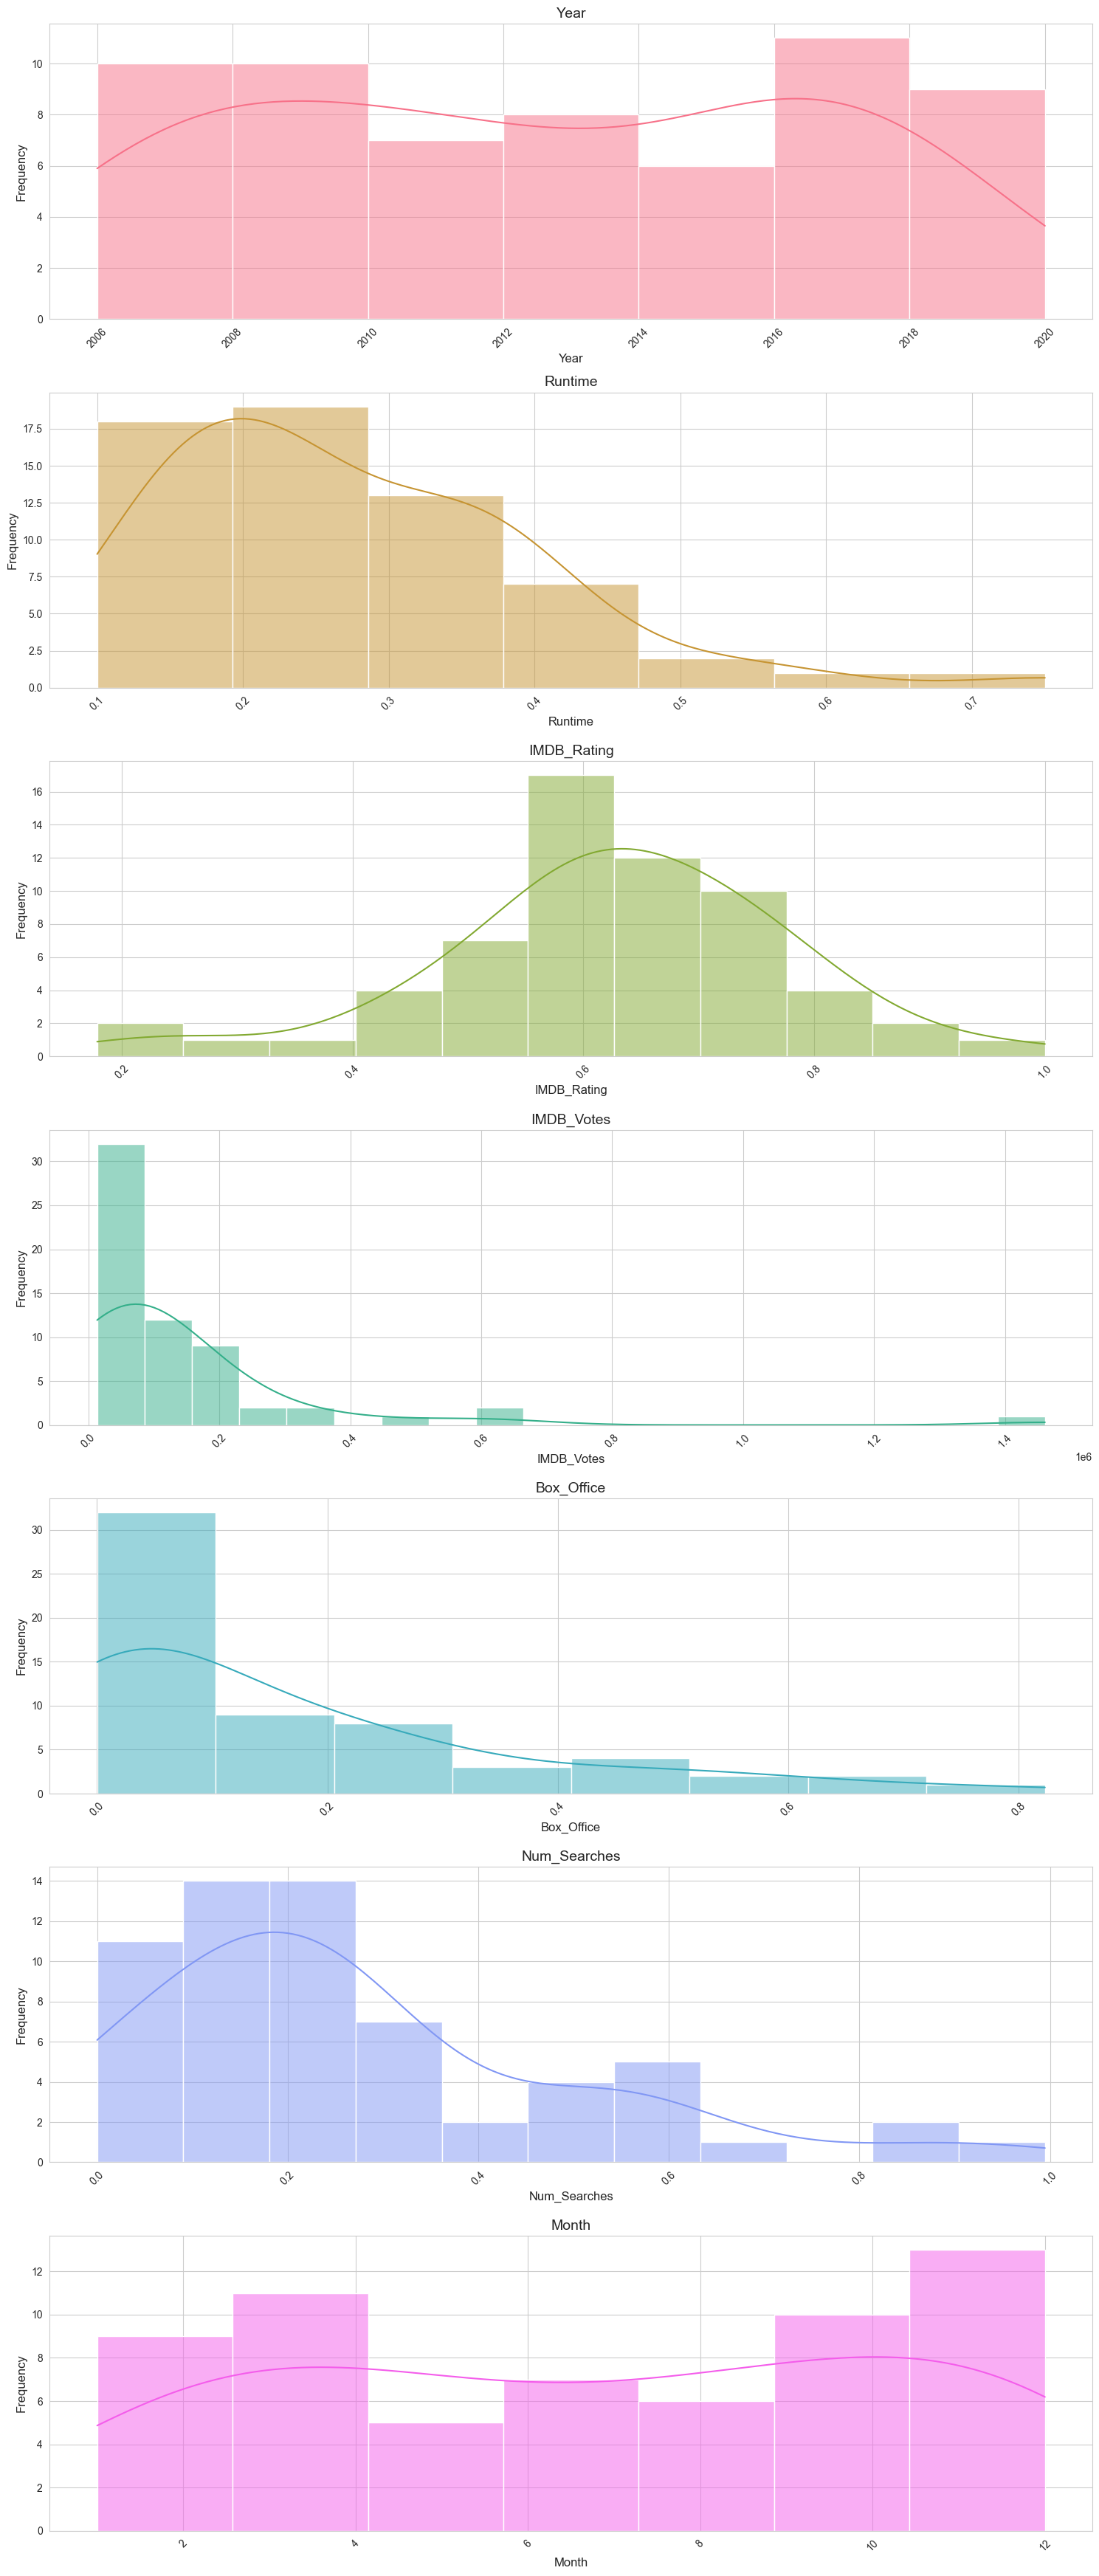

In [480]:
numerical_columns = ["Year", "Runtime", "IMDB_Rating", "IMDB_Votes", "Box_Office", "Num_Searches", "Month"]
plot_histograms(processed_df_filtered, numerical_columns)

In [481]:
# Function: plot_boxplots
# Description: plots boxplots for numerical data
# Input: dataframe, numerical features (list)
# Output: boxplots
# Example Usage: plot_boxplots(df, features)
def plot_boxplots(df, features):
    fig, axes = plt.subplots(nrows=len(features), ncols=1, figsize=(15, 5 * len(features)))

    for ax, col, color in zip(axes, features, palette):
        sns.boxplot(x=df[col], ax=ax, color=color)
        ax.set_title(col, fontsize=14)
        ax.set_xlabel(col, fontsize=12)
        ax.set_ylabel('Value', fontsize=12)
        ax.tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

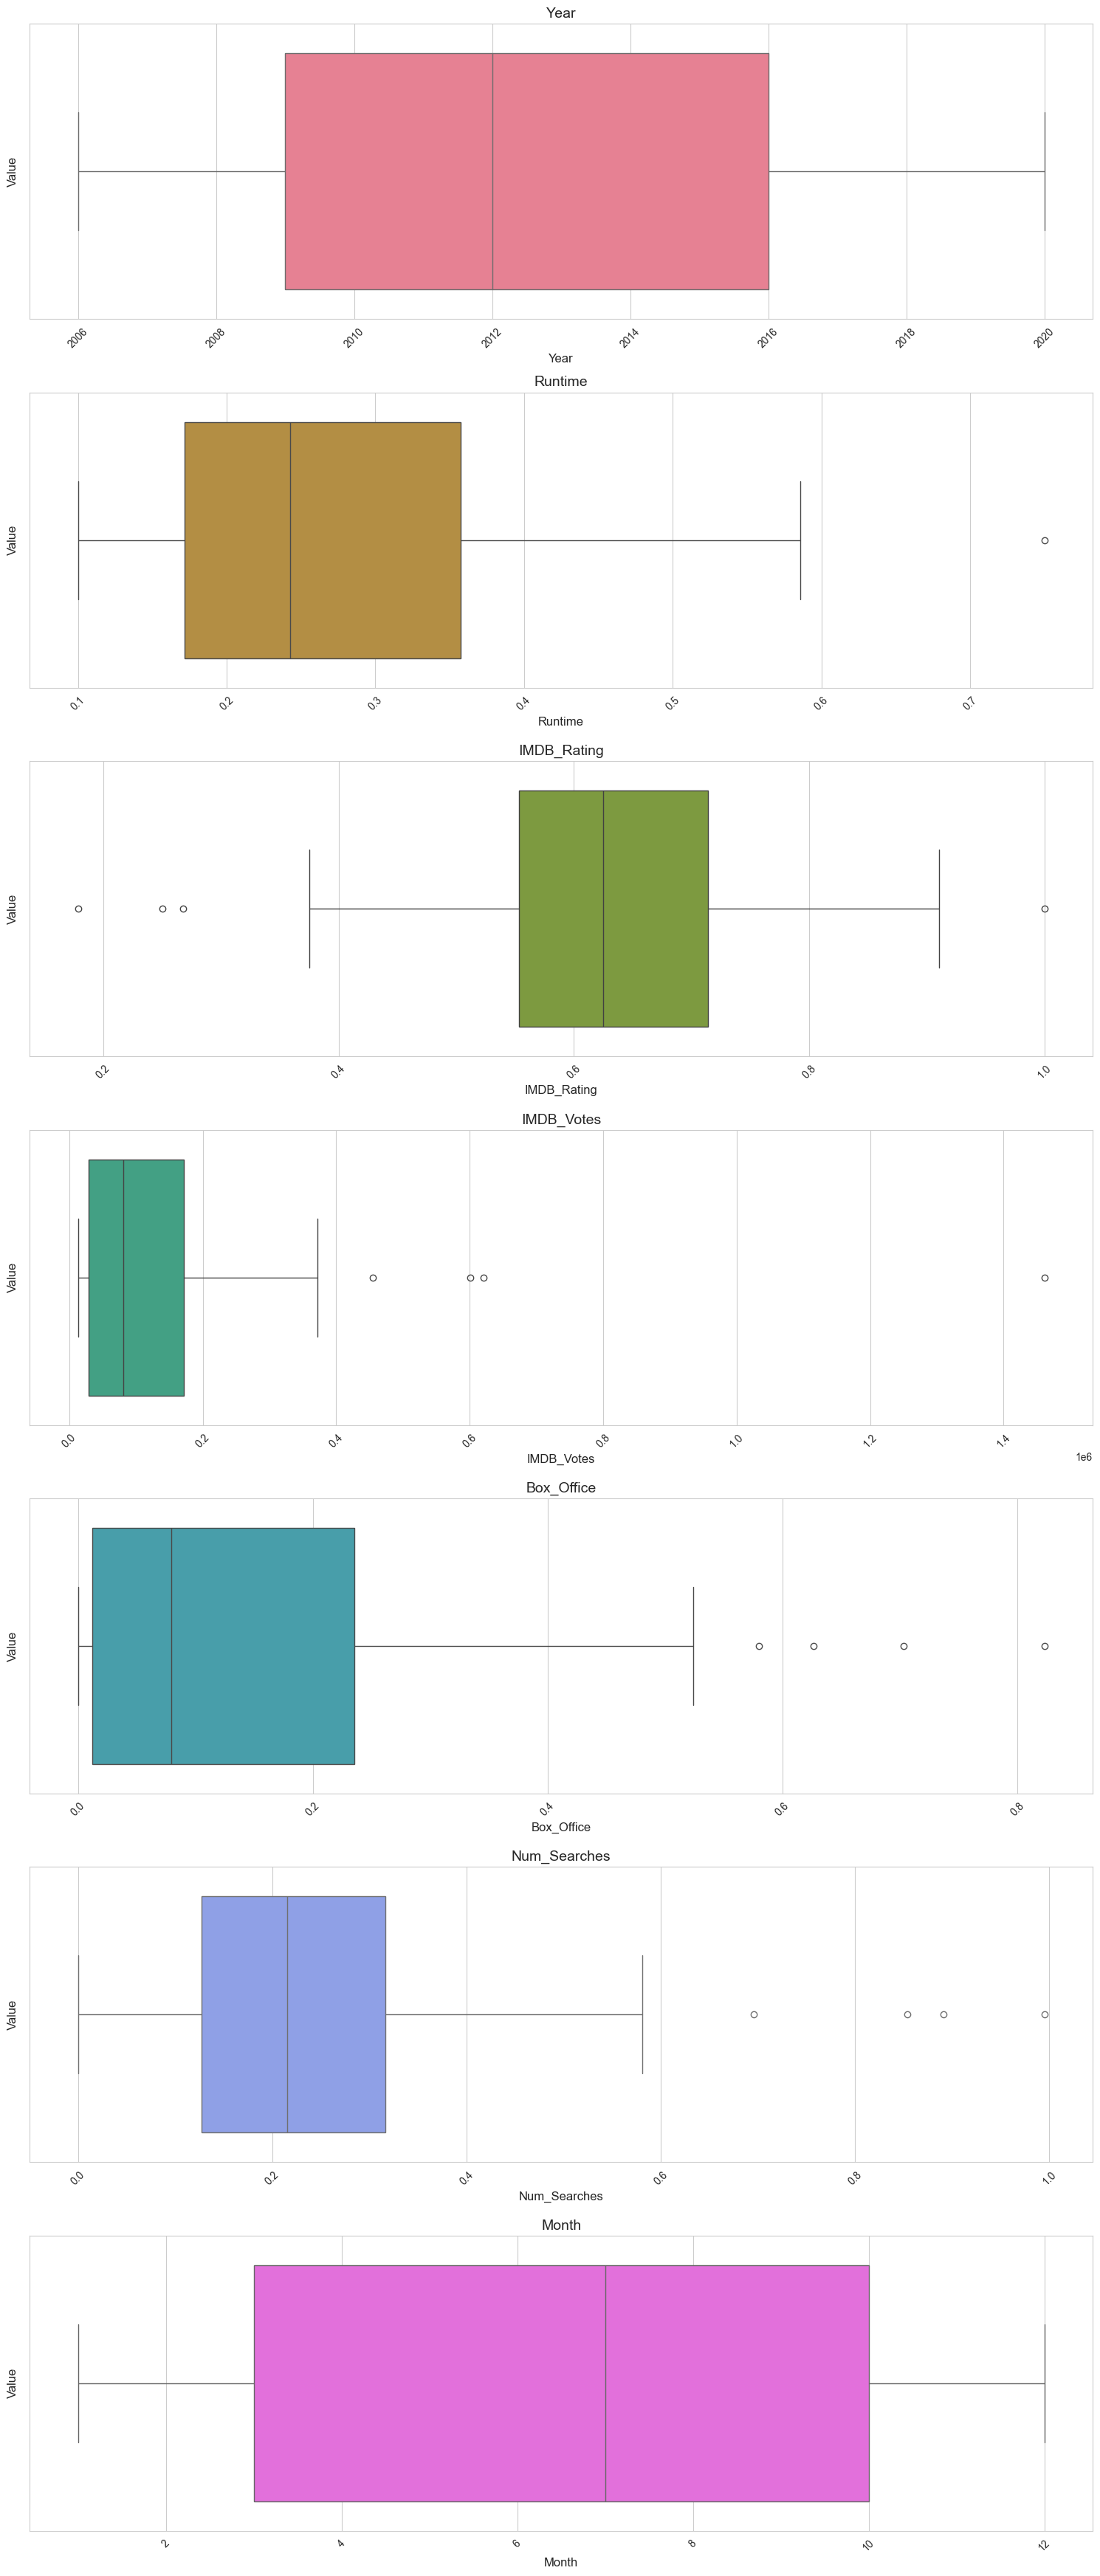

In [482]:
plot_boxplots(processed_df_filtered, numerical_columns)

#### B. Correlations

In [483]:
# Function: plot_heatmap
# Description: plots heatmap for numerical data
# Input: dataframe, numerical features (list)
# Output: heatmaps
# Example Usage: plot_heatmap(df, features)

def plot_heatmap(df, features):
    plt.figure(figsize=(14, 10))

    heatmap = sns.heatmap(
        df[features].corr(),
        annot=True,
        cmap="YlGnBu",
        fmt=".2f",
        linewidths=0.5,
        annot_kws={"size": 10}
    )

    plt.title("Correlation Matrix", fontsize=16)

    colorbar = heatmap.collections[0].colorbar
    colorbar.set_ticks([-1, -0.5, 0, 0.5, 1])
    colorbar.set_ticklabels(['-1.0', '-0.5', '0.0', '0.5', '1.0'])
    colorbar.ax.tick_params(labelsize=10)

    plt.show()

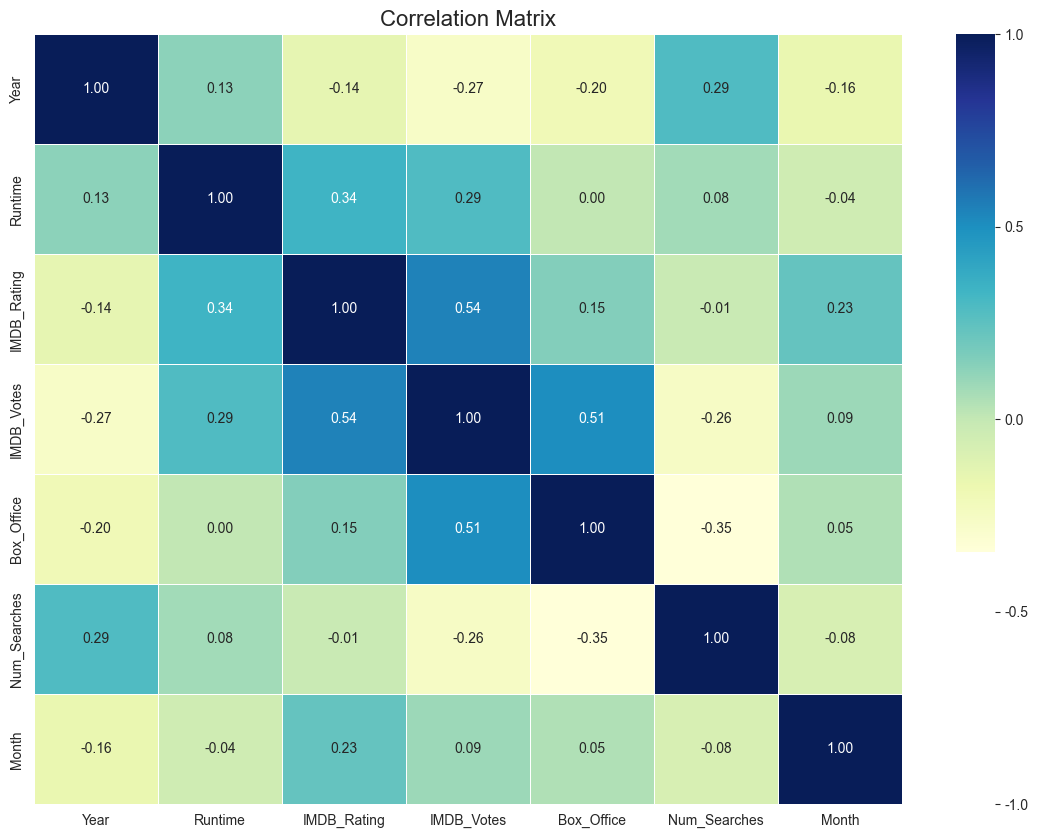

In [484]:
plot_heatmap(normalized_df_filtered, numerical_columns)

In [430]:
# remove movies with no number of searches
processed_df_filtered_searches = processed_df_filtered[processed_df_filtered['Num_Searches'] > 0]
normalized_df_filtered_searches = normalized_df_filtered[normalized_df_filtered['Num_Searches'] > 0]

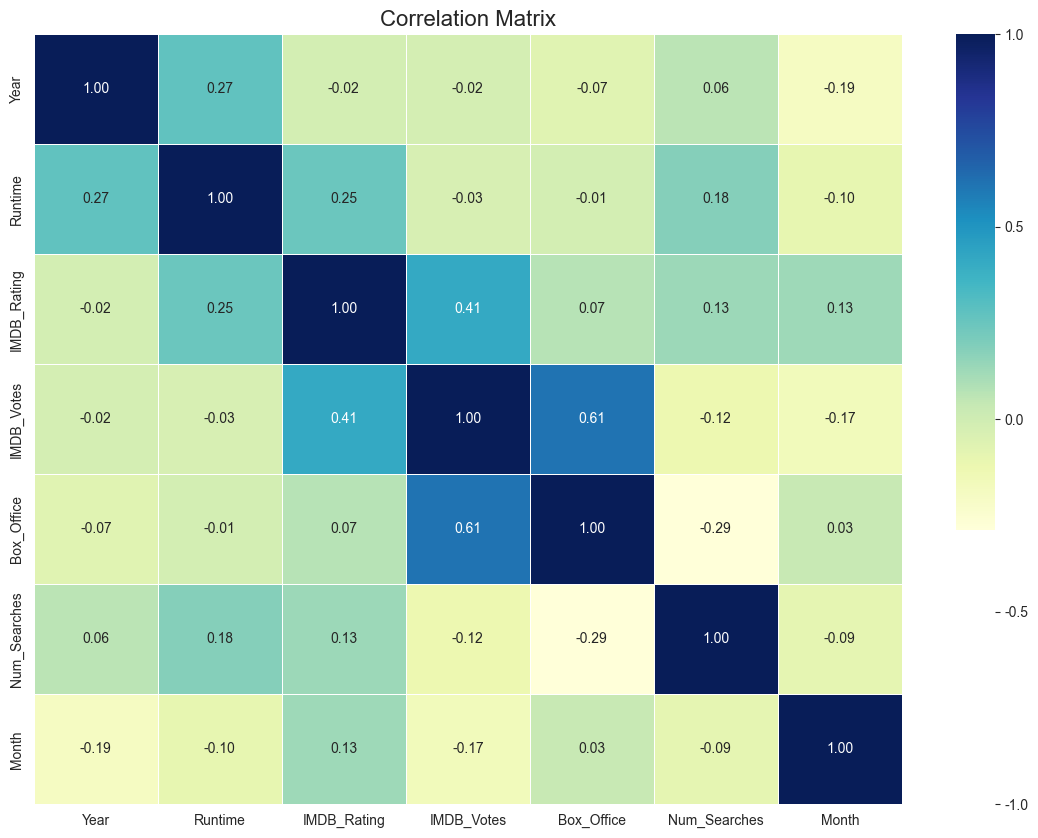

In [485]:
plot_heatmap(normalized_df_filtered_searches, numerical_columns)

#### C. Pairplots

In [499]:
# Function: plot_pairplots
# Description: plots pairplots for numerical data
# Input: dataframe, numerical features (list), feature for hue (str)
# Output: pairplots
# Example Usage: plot_pairplots(df, features, feature)
def plot_pairplots(df, features, feature_hue):
    sns.pairplot(df[features],
                hue=feature_hue,
                palette="viridis",
                diag_kind="kde",
                height=3,
                plot_kws={'edgecolor': 'black'})

    pairplot.fig.suptitle("Pairplot of Movie Metrics", y=1.02, fontsize=16)

    plt.show()

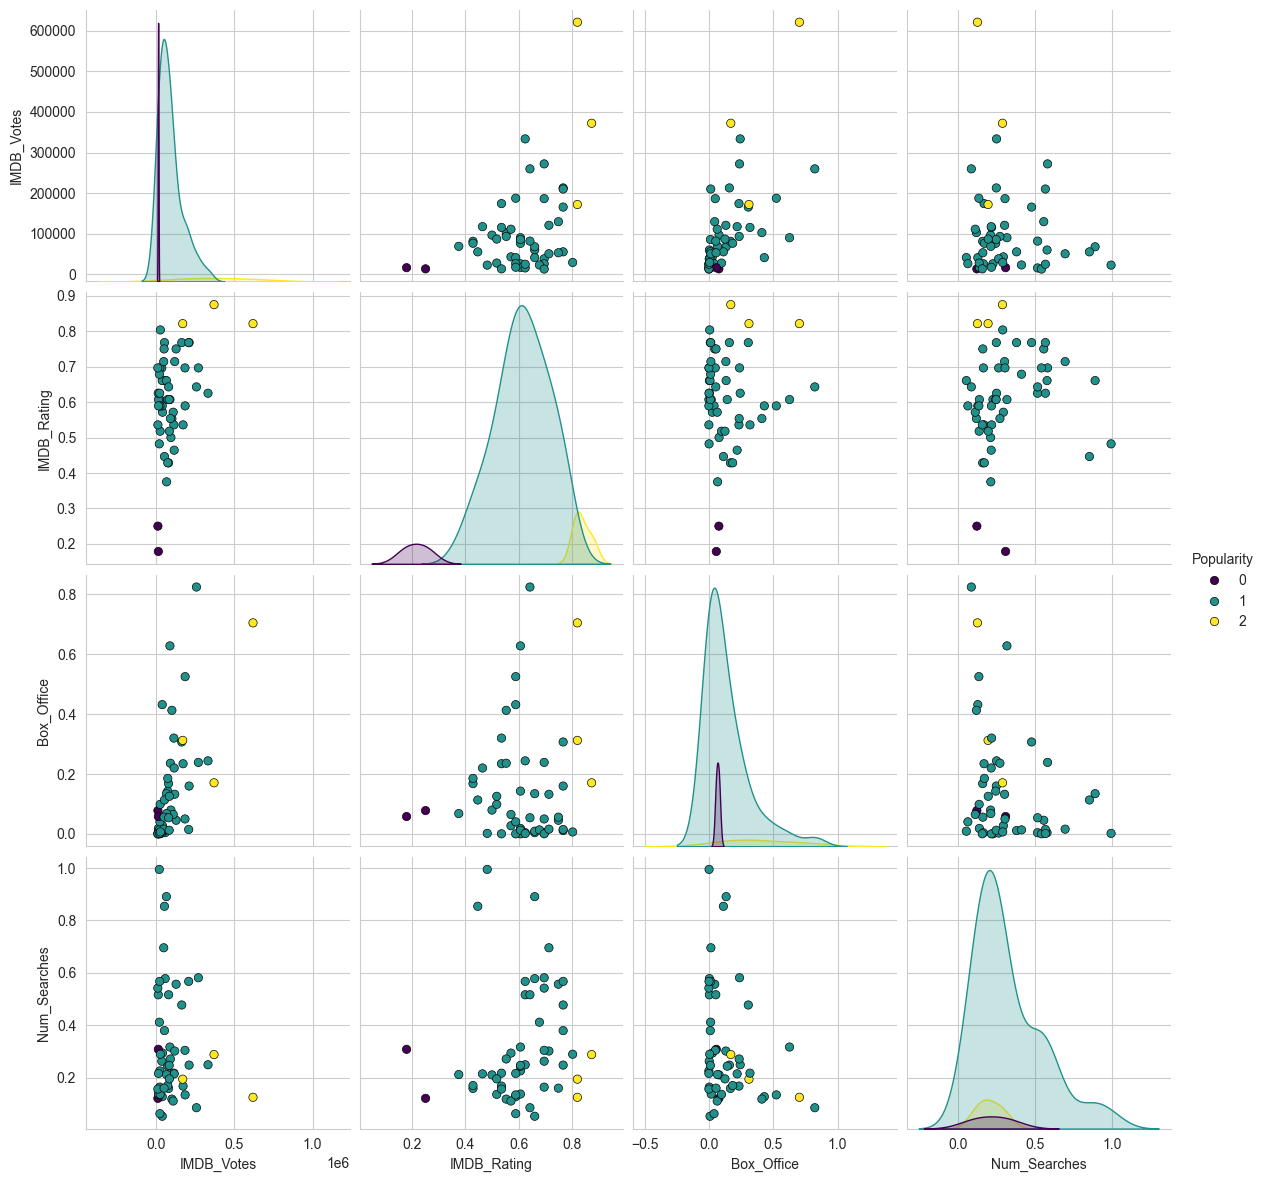

In [500]:
pairplot_features = ["IMDB_Votes", "IMDB_Rating", "Box_Office", "Num_Searches", "Popularity"]
feature_hue = "Popularity"
plot_pairplots(normalized_df_filtered_searches, pairplot_features, feature_hue)

#### D. Barplots

In [501]:
# Function: plot_countplot
# Description: plots countplots for categorical features
# Input: dataframe, categorical feature for count (str), categorical feature for hue (str)
# Output: countplot
# Example Usage: plot_countplot(df, feature1, feature2)

def plot_countplot(df, feature1, feature2):
    fig, ax = plt.subplots(figsize=(10, 6))

    sns.countplot(
        data=df,
        x=feature1,
        hue=feature2,
        palette="viridis",
        edgecolor='black',
        ax=ax,
        dodge=True
    )

    ax.set_title(f"Distribution of {feature1}", fontsize=18, fontweight='bold')
    ax.set_xlabel(feature1, fontsize=14)
    ax.set_ylabel("Count", fontsize=14)

    ax.tick_params(axis='x', rotation=45)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.legend(title=feature2, loc='upper right', fontsize=12)

    plt.tight_layout()
    plt.show()

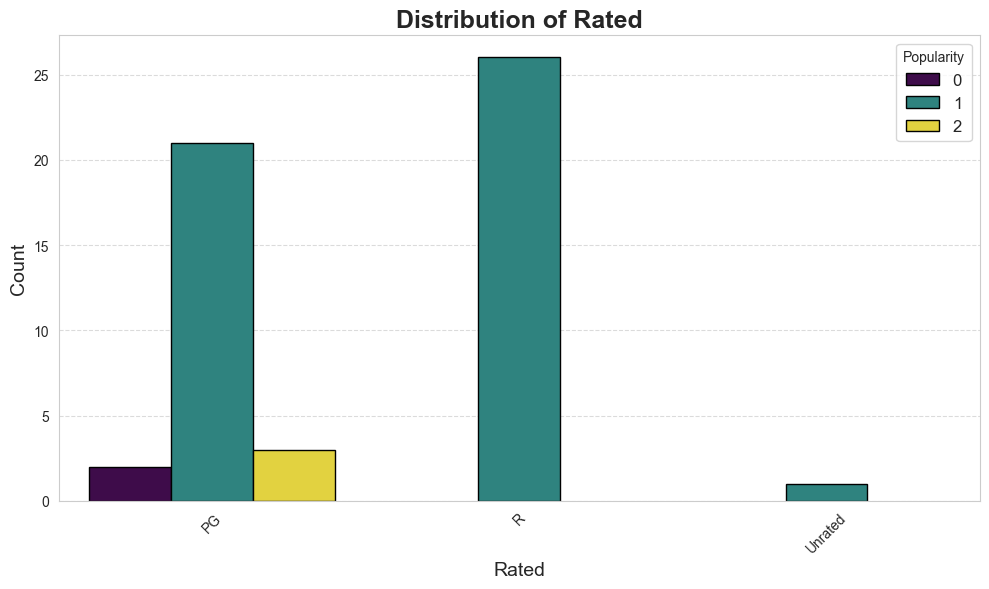

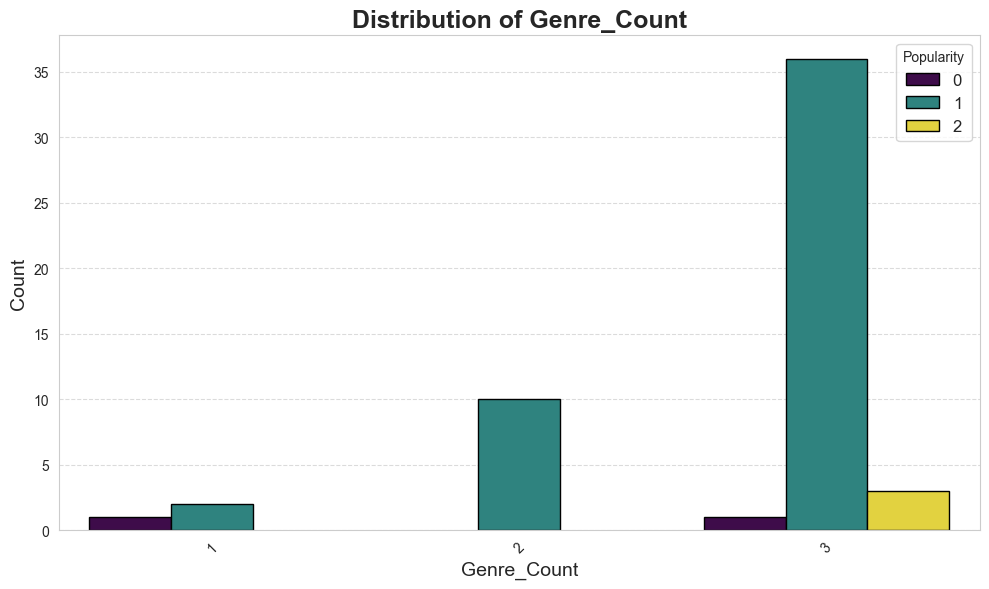

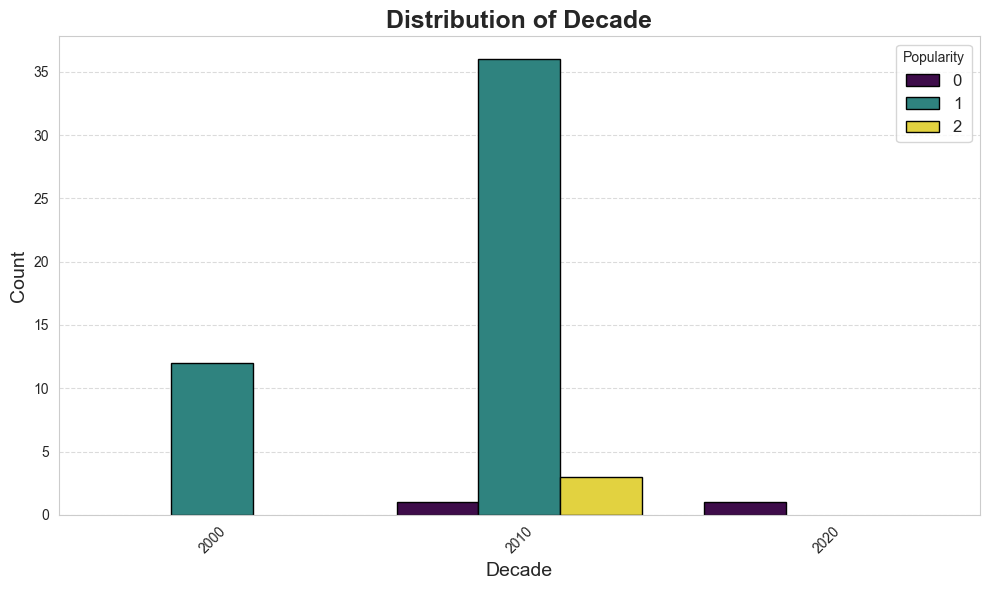

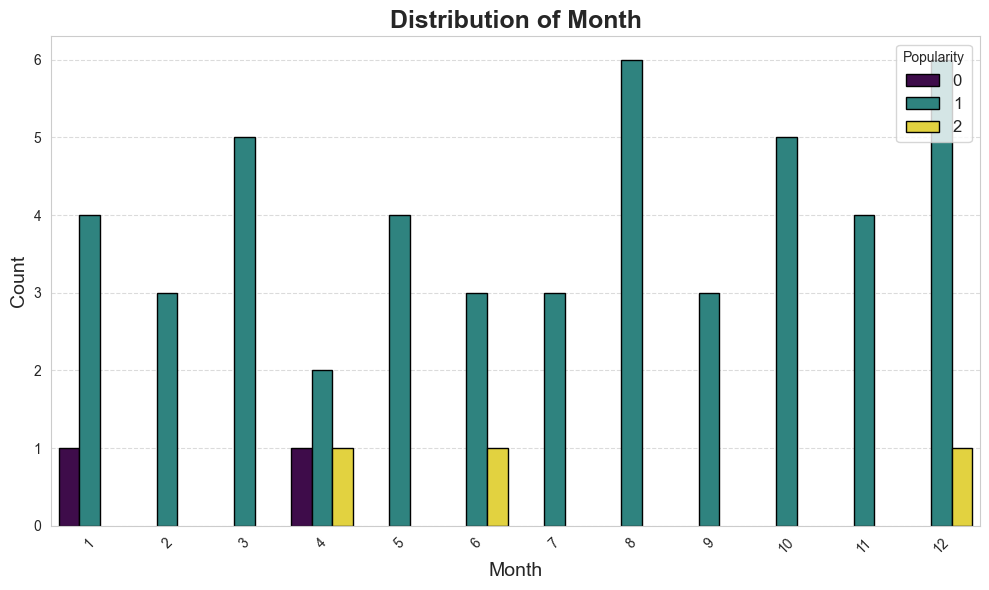

In [502]:
plot_countplot(normalized_df_filtered_searches, "Rated", "Popularity")
plot_countplot(normalized_df_filtered_searches, "Genre_Count", "Popularity")
plot_countplot(normalized_df_filtered_searches, "Decade", "Popularity")
plot_countplot(normalized_df_filtered_searches, "Month", "Popularity")

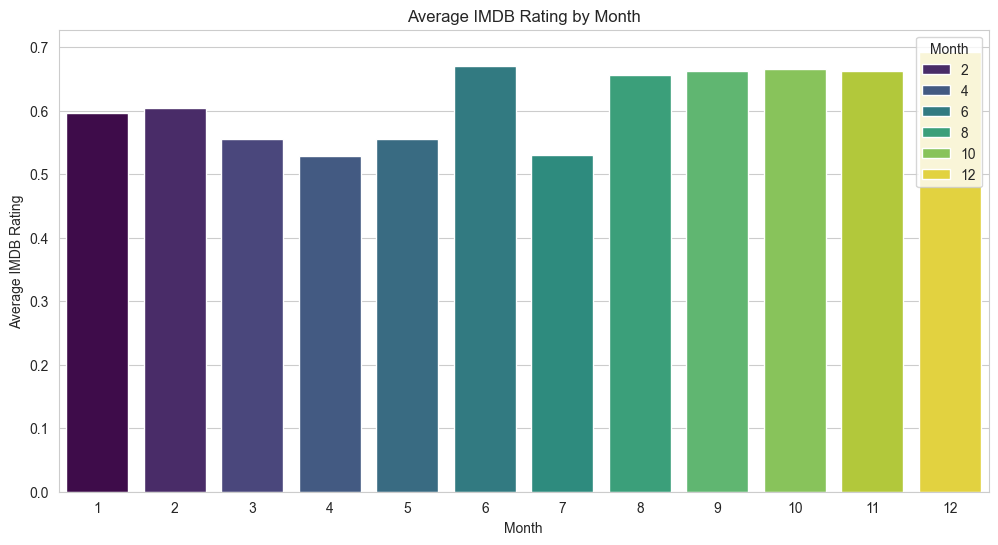

In [503]:
monthly_avg = normalized_df.groupby("Month")["IMDB_Rating"].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_avg, x="Month", y="IMDB_Rating", hue='Month', palette="viridis")
plt.title("Average IMDB Rating by Month")
plt.xlabel("Month")
plt.ylabel("Average IMDB Rating")
plt.show()

#### E. Boxplots

In [504]:
# Function: plot_boxplot
# Description: plots boxplot for categorical feature
# Input: dataframe, categorical feature x (str), numerical feature y (str)
# Output: boxplot
# Example Usage: plot_boxplot(df, feature1, feature2)

def plot_boxplot(df, feature1, feature2):
    fig, ax = plt.subplots(figsize=(10, 6))

    sns.boxplot(
        data=df,
        x=feature1,
        y=feature2,
        hue=feature1,
        palette="viridis",
        width=0.5,
        fliersize=5,
        linewidth=1.5,
        ax=ax
    )

    ax.set_title(f"{feature2} by {feature1}", fontsize=18, fontweight='bold')
    ax.set_xlabel(feature1, fontsize=14)
    ax.set_ylabel(feature2, fontsize=14)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

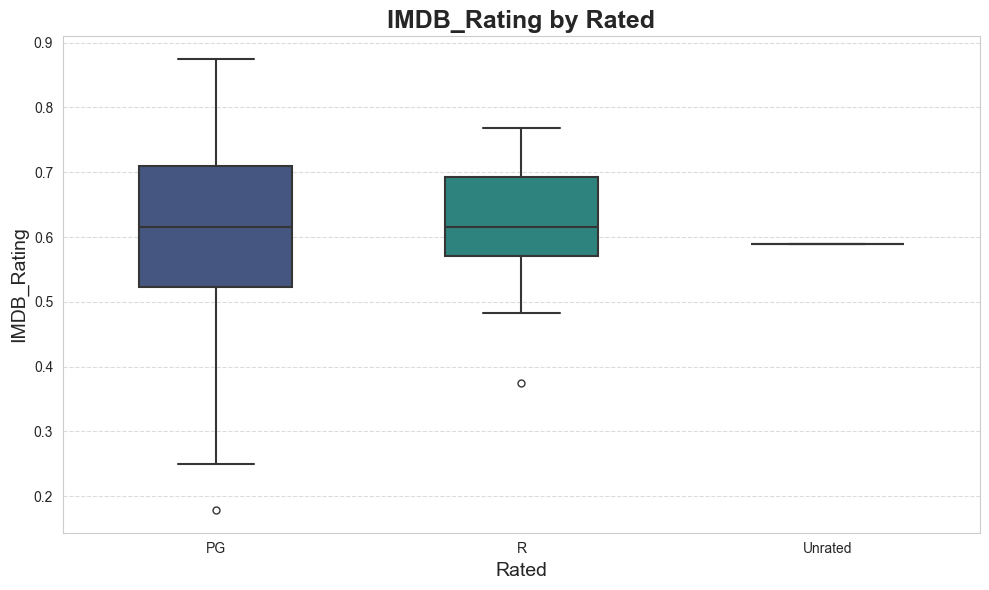

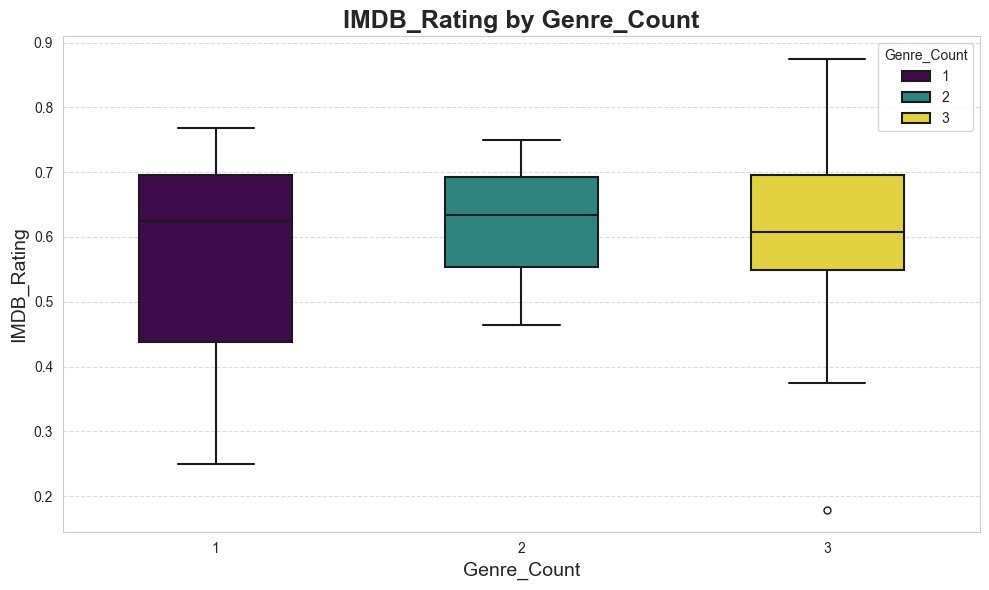

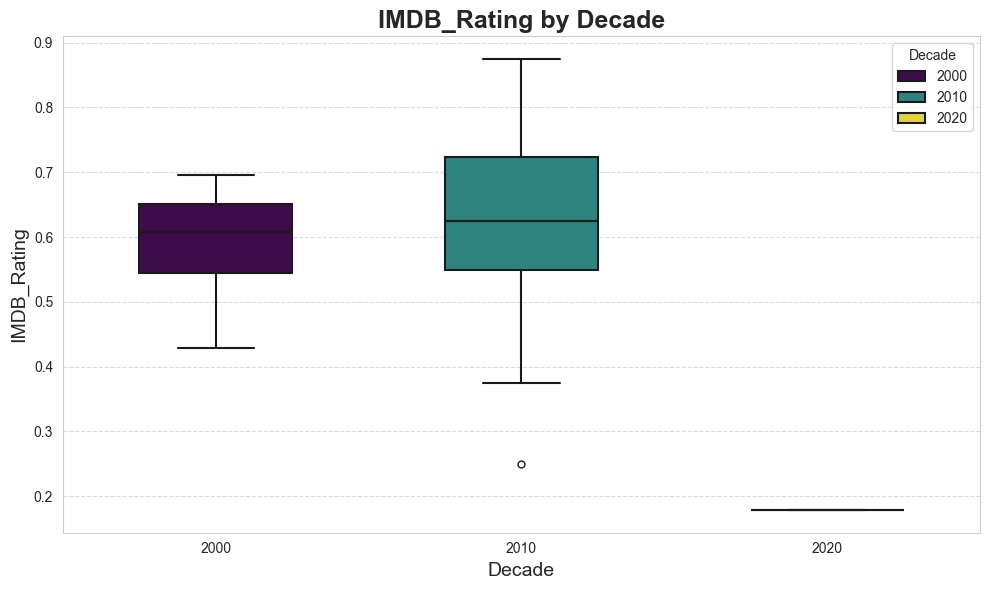

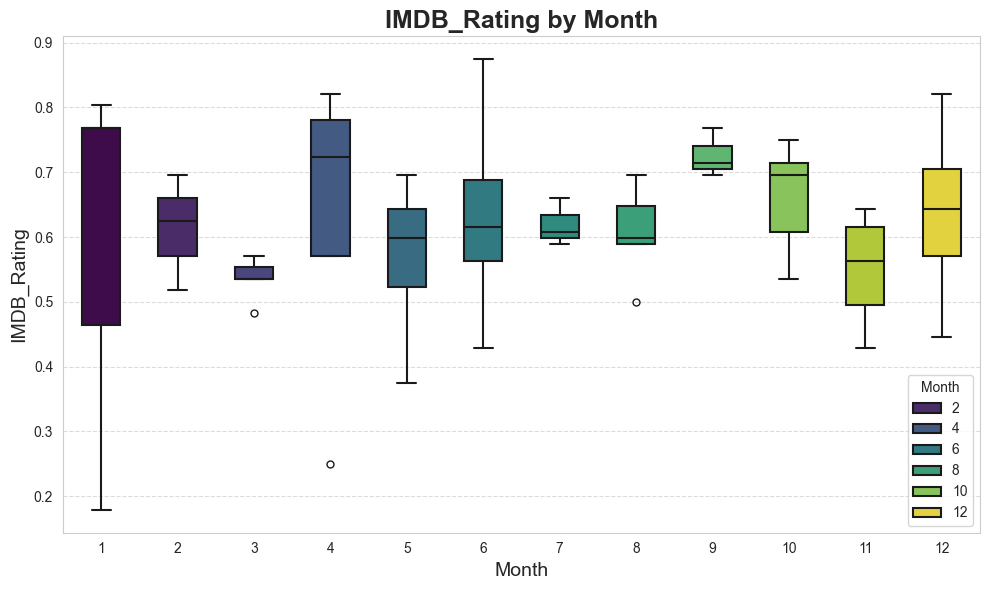

In [505]:
plot_boxplot(normalized_df_filtered_searches, "Rated", "IMDB_Rating")
plot_boxplot(normalized_df_filtered_searches, "Genre_Count", "IMDB_Rating")
plot_boxplot(normalized_df_filtered_searches, "Decade", "IMDB_Rating")
plot_boxplot(normalized_df_filtered_searches, "Month", "IMDB_Rating")

## Step 4: Machine Learning Models

#### A. predict box office earnings using regression

In [531]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Function: rf_regression
# Description: performs regression to predict target value
# Input: dataframe, input features x (df), target feature y (df)
# Output: model
# Example Usage: model = rf_regression(df, x , y)

def rf_regression(X , y):
    
    #split training and test data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = RandomForestRegressor(random_state=42, n_estimators=100)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Squared Error: {mse}")
    print(f"R² Score: {r2}")
    
    return model

In [532]:
# perform regression to predict box office earnings
features = ['Year', 'Rated', 'Runtime', 'IMDB_Rating', 'IMDB_Votes', 'Num_Searches',
            'Month', 'Decade', 'Genre_Count', 'Popularity']
X = normalized_df_filtered_searches[features]
y = normalized_df_filtered_searches["Box_Office"]

# one-hot encode categorical features
X = pd.get_dummies(X, columns=['Rated', 'Decade', 'Month', 'Popularity', 'Genre_Count'], drop_first=True)
X.head()

,Year,Runtime,IMDB_Rating,IMDB_Votes,Num_Searches,Rated_R,Rated_Unrated,Decade_2010,Decade_2020,Month_2,...,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Popularity_1,Popularity_2,Genre_Count_2,Genre_Count_3
0,2015,0.307143,0.767857,212877,0.247488,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,True
4,2011,0.271429,0.571429,43369,0.293360,True,False,True,False,False,...,False,False,False,False,False,False,True,False,False,True
6,2017,0.378571,0.589286,41464,0.126911,True,False,True,False,False,...,True,False,False,False,False,False,True,False,False,True
7,2013,0.150000,0.607143,26330,0.225426,True,False,True,False,False,...,False,False,False,False,False,False,True,False,False,True
8,2015,0.314286,0.660714,60210,0.577763,True,False,True,False,False,...,False,False,False,False,False,True,True,False,False,True


In [533]:
model1 = rf_regression(X , y)

Mean Squared Error: 0.0156880655197389
R² Score: -0.6019562212573226


In [534]:
normalized_df_bo = normalized_df[normalized_df['Box_Office'] > 0]
normalized_df_bo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113 entries, 0 to 147
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Title         113 non-null    object        
 1   Year          113 non-null    int64         
 2   Rated         113 non-null    object        
 3   Runtime       113 non-null    float64       
 4   IMDB_Rating   113 non-null    float64       
 5   IMDB_Votes    113 non-null    int64         
 6   Box_Office    113 non-null    float64       
 7   Released      113 non-null    datetime64[ns]
 8   Genre         113 non-null    object        
 9   Director      113 non-null    object        
 10  Writer        113 non-null    object        
 11  Actors        113 non-null    object        
 12  Plot          113 non-null    object        
 13  Language      113 non-null    object        
 14  Country       113 non-null    object        
 15  Awards        113 non-null    object        


In [535]:
# perform regression to predict box office earnings
features2 = ['Year', 'Rated', 'Runtime', 'IMDB_Rating', 'IMDB_Votes', 'Num_Searches',
            'Month', 'Decade', 'Genre_Count', 'Popularity']
X2 = normalized_df_bo[features2]
y2 = normalized_df_bo["Box_Office"]

# one-hot encode categorical features
X2 = pd.get_dummies(X2, columns=['Rated', 'Decade', 'Month', 'Popularity', 'Genre_Count'], drop_first=True)

In [528]:
model2 = rf_regression(X2 , y2)

Mean Squared Error: 0.029842987874636497
R² Score: 0.3099986208025126


In [530]:
# get feature importances
importances = model2.feature_importances_

feature_importance_df = pd.DataFrame({"Feature": X2.columns, "Importance": importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

print(feature_importance_df.head(10))

AttributeError: 'NoneType' object has no attribute 'feature_importances_'

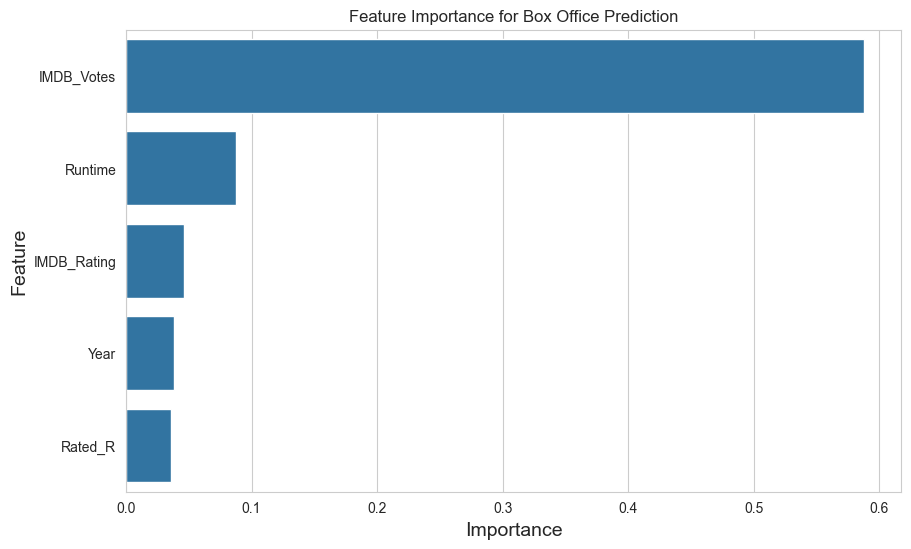

In [474]:
top_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_features, x="Importance", y="Feature")
plt.xlabel("Importance", fontsize=14)
plt.ylabel("Feature", fontsize=14)
plt.title("Feature Importance for Box Office Prediction")
plt.show()